In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from scipy.interpolate import spline
from tqdm import tqdm

In [7]:
def smooth(values, w_range):
    new_values = []

    for val in tqdm(range(len(values))):
        
        w_start = val - w_range
        w_end = val + w_range
        w_start = max(w_start, 0)
        w_end = min(w_end, (len(values) - 1))
        loc_vals = values[w_start : w_end]
        local_value = sum(loc_vals)/len(loc_vals)
        new_values.append(local_value)
    return new_values

In [38]:
rewards_data = pd.read_csv("rewards.csv")
self_c = pd.read_csv("self_coins.csv")
othr_c = pd.read_csv("other_coins.csv")
neth_c = pd.read_csv("neither_coins.csv")
self_c_2 = pd.read_csv("self_coins_2.csv")
othr_c_2 = pd.read_csv("other_coins_2.csv")
neth_c_2 = pd.read_csv("neither_coins_2.csv")

In [15]:
len(rewards_data), len(self_c)

(100222, 99941)

In [22]:
len(neth_c['episode']), len(othr_c['episode']), len(self_c['episode'])

(99989, 100023, 99941)

In [39]:
episodes_n = neth_c['episode']
episodes_o = othr_c['episode']
episodes_s = self_c['episode']
episodes_n_2 = neth_c_2['episode']
episodes_o_2 = othr_c_2['episode']
episodes_s_2 = self_c_2['episode']

In [42]:
smoothed_reward = smooth(rewards_data['50 wo map - reward'], 100)
episodes = rewards_data['episode']
smooth_amount = 100

smoothed_neth = smooth(neth_c['50 wo map - neither_coins1'], smooth_amount)
smoothed_othr = smooth(othr_c['50 wo map - other_coins1'], smooth_amount)
smoothed_self = smooth(self_c['50 wo map - self_coins1'], smooth_amount)

100%|██████████| 99941/99941 [00:06<00:00, 14928.73it/s]


In [43]:
smooth_amount = 100

smoothed_neth_2 = smooth(neth_c_2['50 wo map - neither_coins2'], smooth_amount)
smoothed_othr_2 = smooth(othr_c_2['50 wo map - other_coins2'], smooth_amount)
smoothed_self_2 = smooth(self_c_2['50 wo map - self_coins2'], smooth_amount)

100%|██████████| 100017/100017 [00:06<00:00, 14819.33it/s]


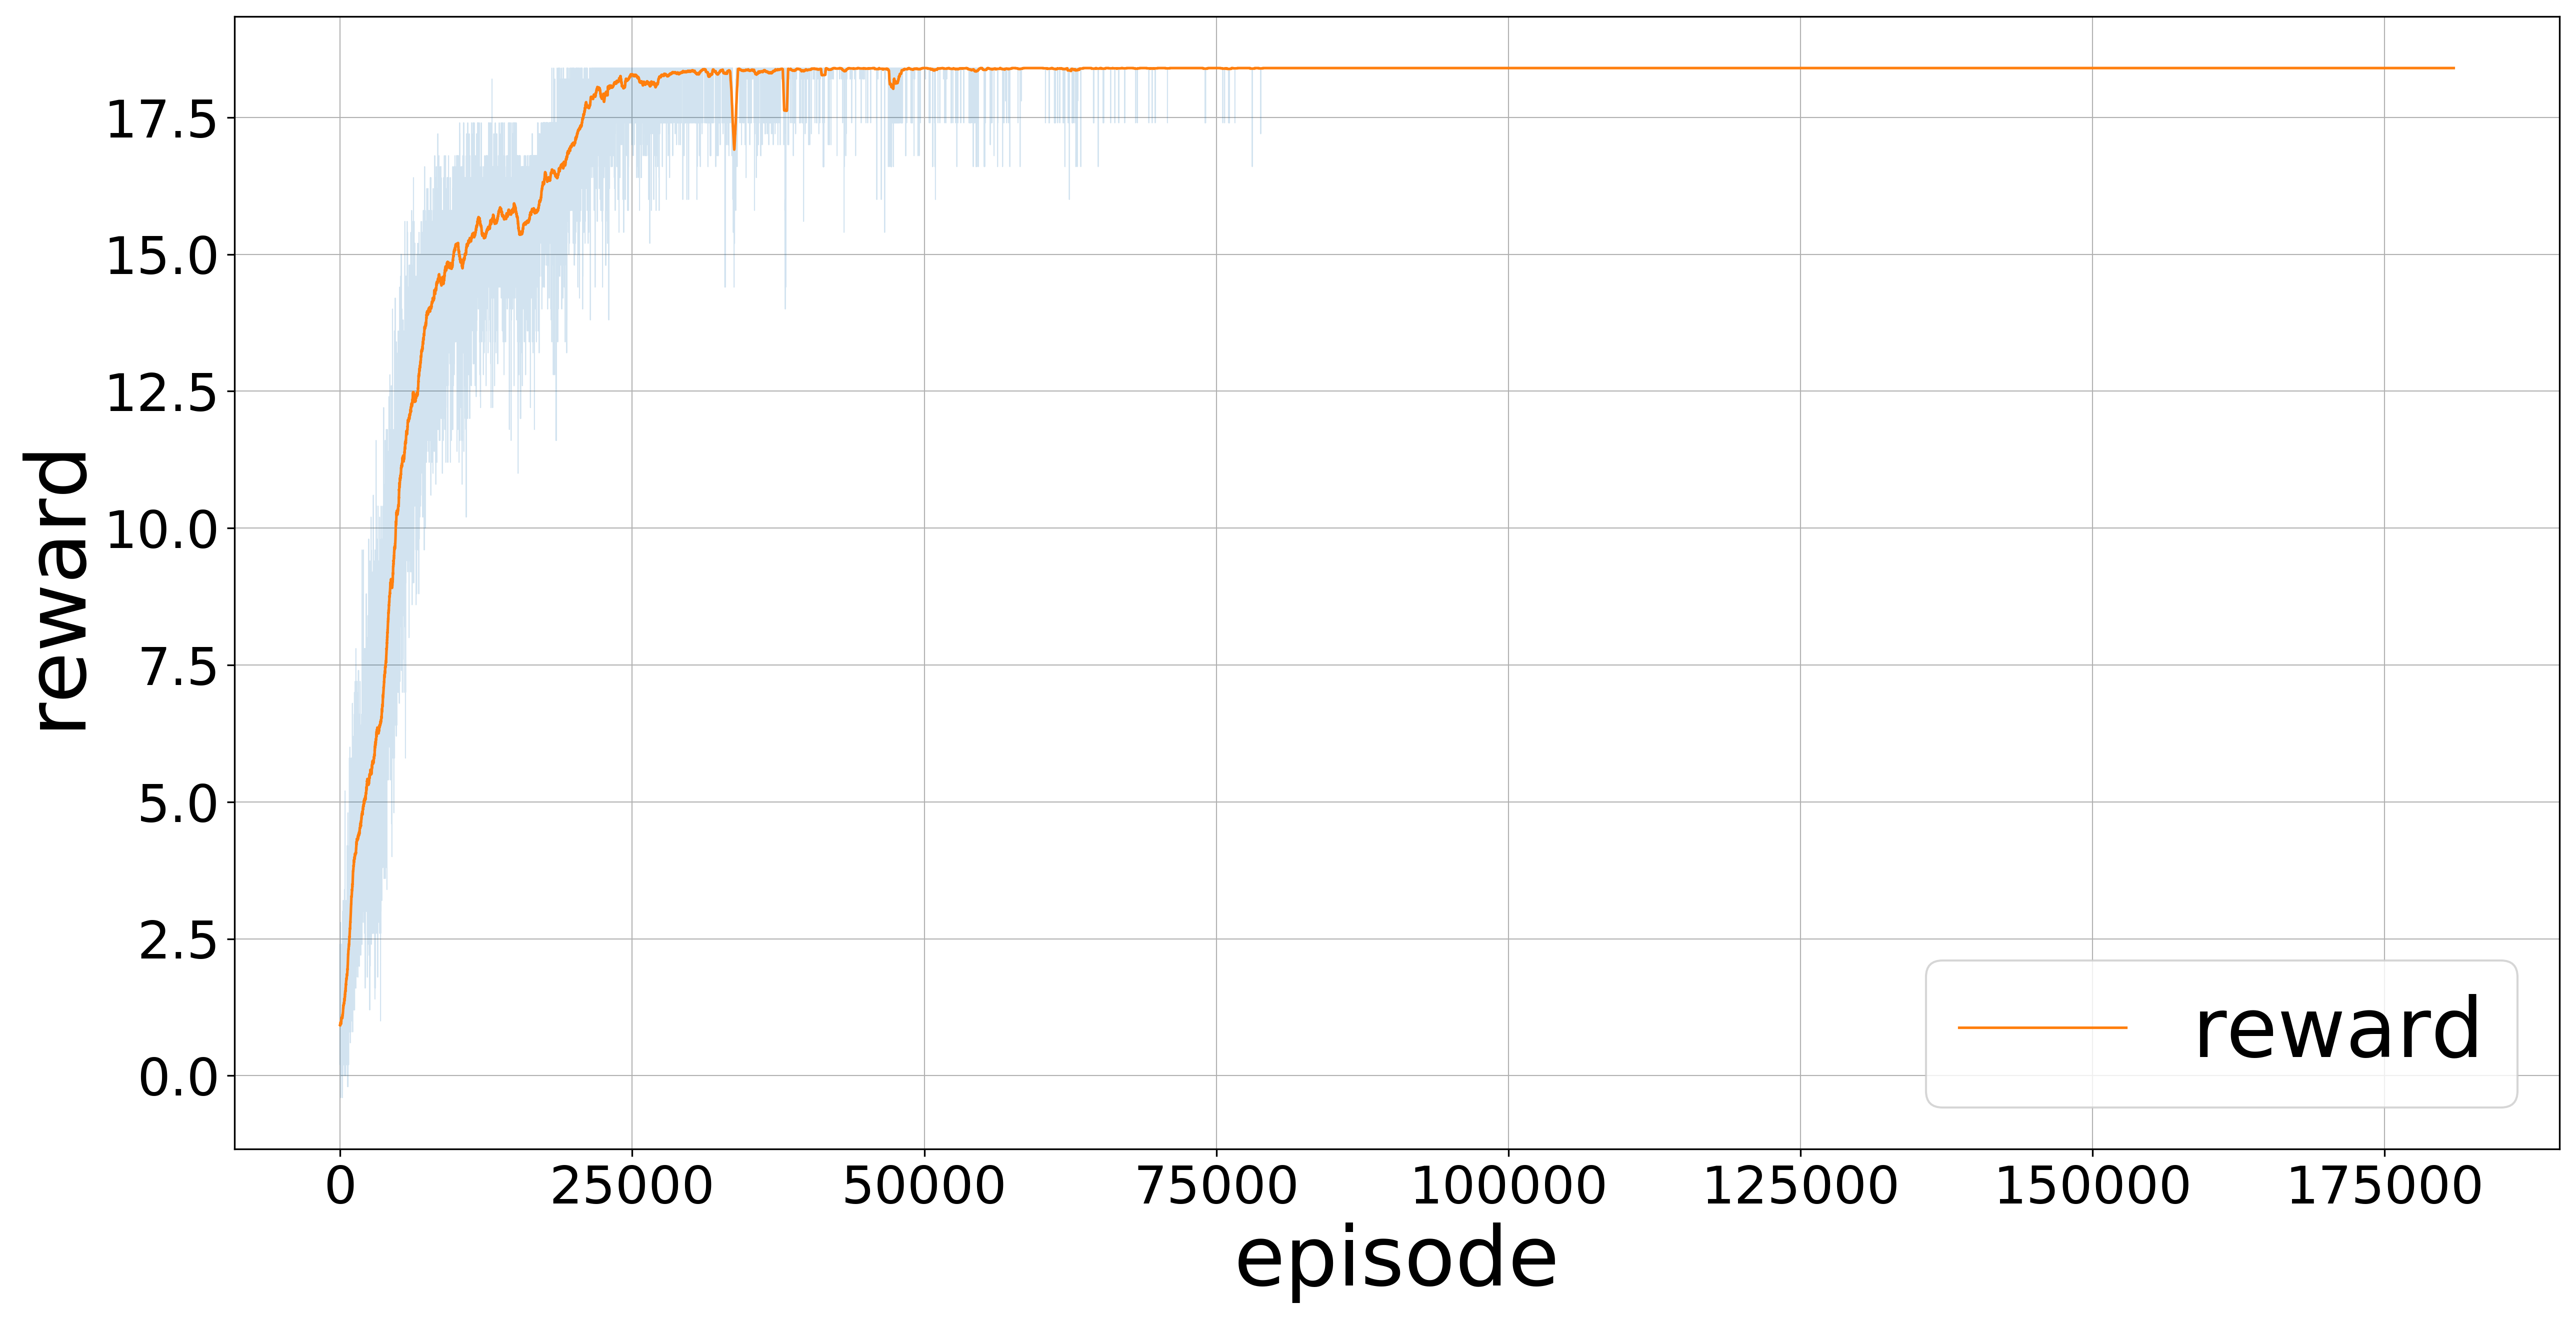

In [20]:
plt.figure(figsize=(20, 10), dpi = 300)
plt.plot(episodes, list(rewards_data['50 wo map - reward']), alpha=0.2, linewidth=0.5)
plt.plot(episodes, smoothed_reward, label='reward', linewidth=1.25)
plt.xlabel('episode', fontsize=40)
plt.ylabel('reward', fontsize=40)
plt.xticks(fontsize=25, rotation=0)
plt.yticks(fontsize=25, rotation=0)
plt.grid(linewidth='0.5')
plt.legend(fontsize=40)
plt.show()

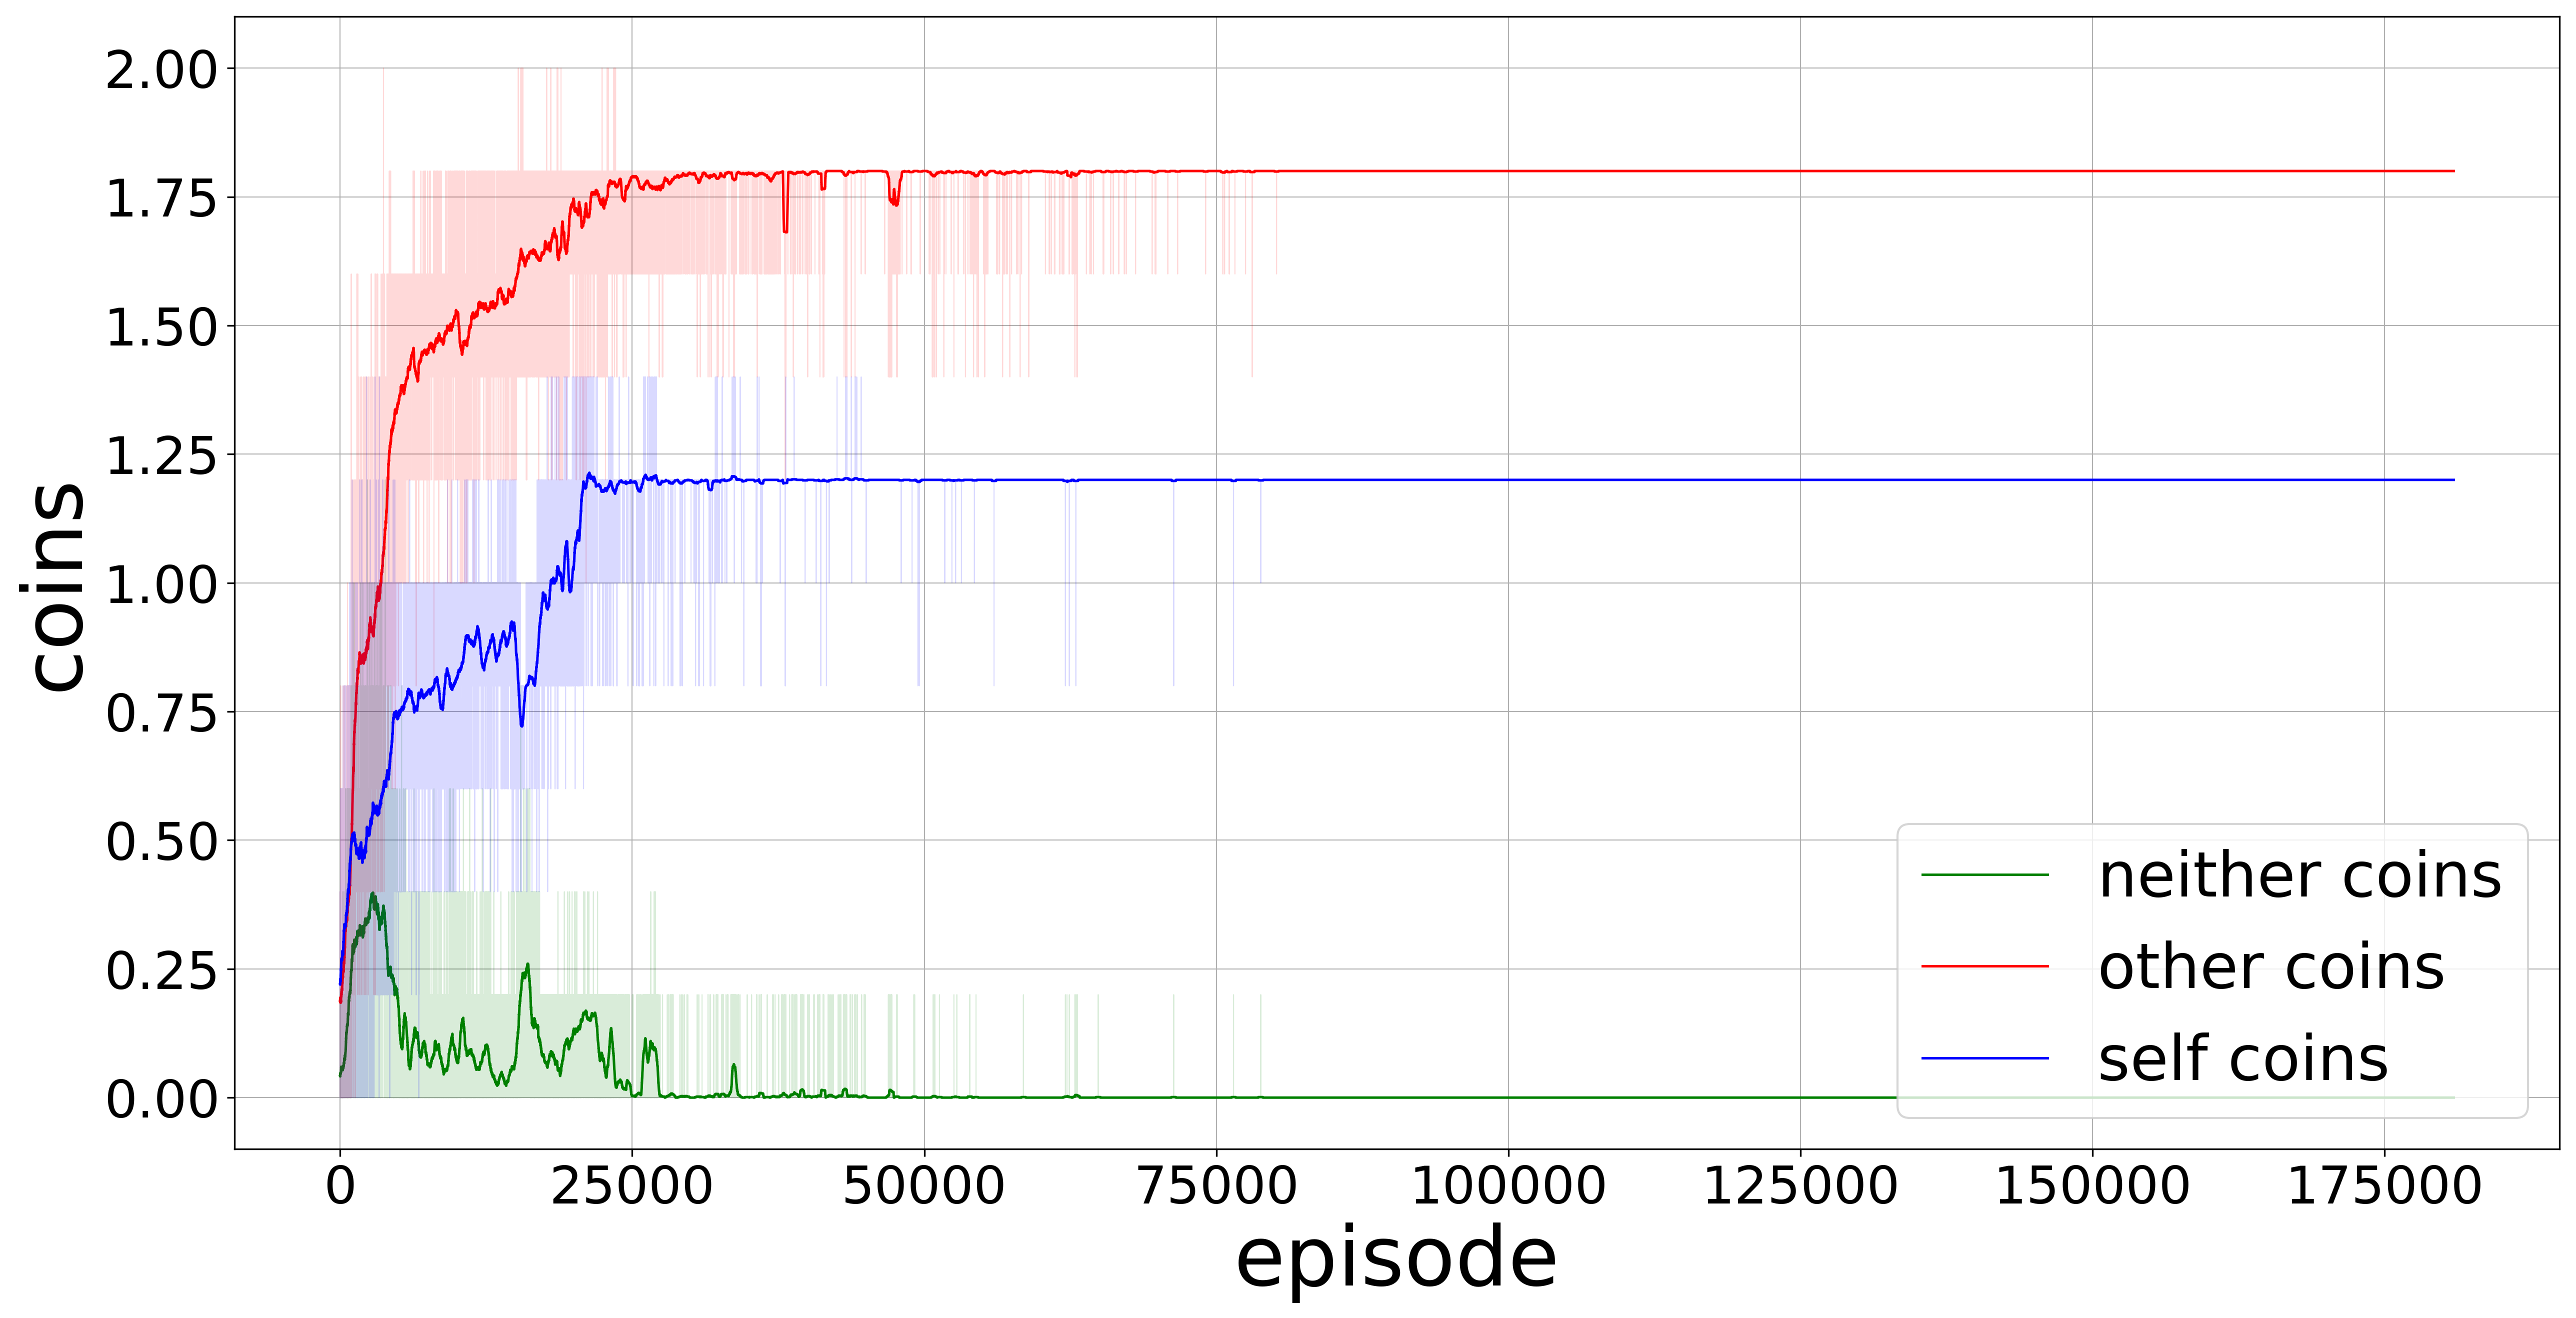

In [36]:
plt.figure(figsize=(20, 10), dpi = 300)
plt.plot(episodes_n, list(neth_c['50 wo map - neither_coins1']), alpha=0.15, c='g', linewidth=0.5)
plt.plot(episodes_n, smoothed_neth, label='neither coins', c='g', linewidth=1.2)

plt.plot(episodes_o, list(othr_c['50 wo map - other_coins1']), alpha=0.15, c='r', linewidth=0.5)
plt.plot(episodes_o, smoothed_othr, label='other coins', c='r', linewidth=1.2)

plt.plot(episodes_s, list(self_c['50 wo map - self_coins1']), alpha=0.15, c='b', linewidth=0.5)
plt.plot(episodes_s, smoothed_self, label='self coins', c='b', linewidth=1.2)
plt.xlabel('episode', fontsize=40)
plt.ylabel('coins', fontsize=40)
plt.xticks(fontsize=25, rotation=0)
plt.yticks(fontsize=25, rotation=0)
plt.grid(linewidth='0.5')
plt.legend(fontsize=30, loc = 4)
plt.show()

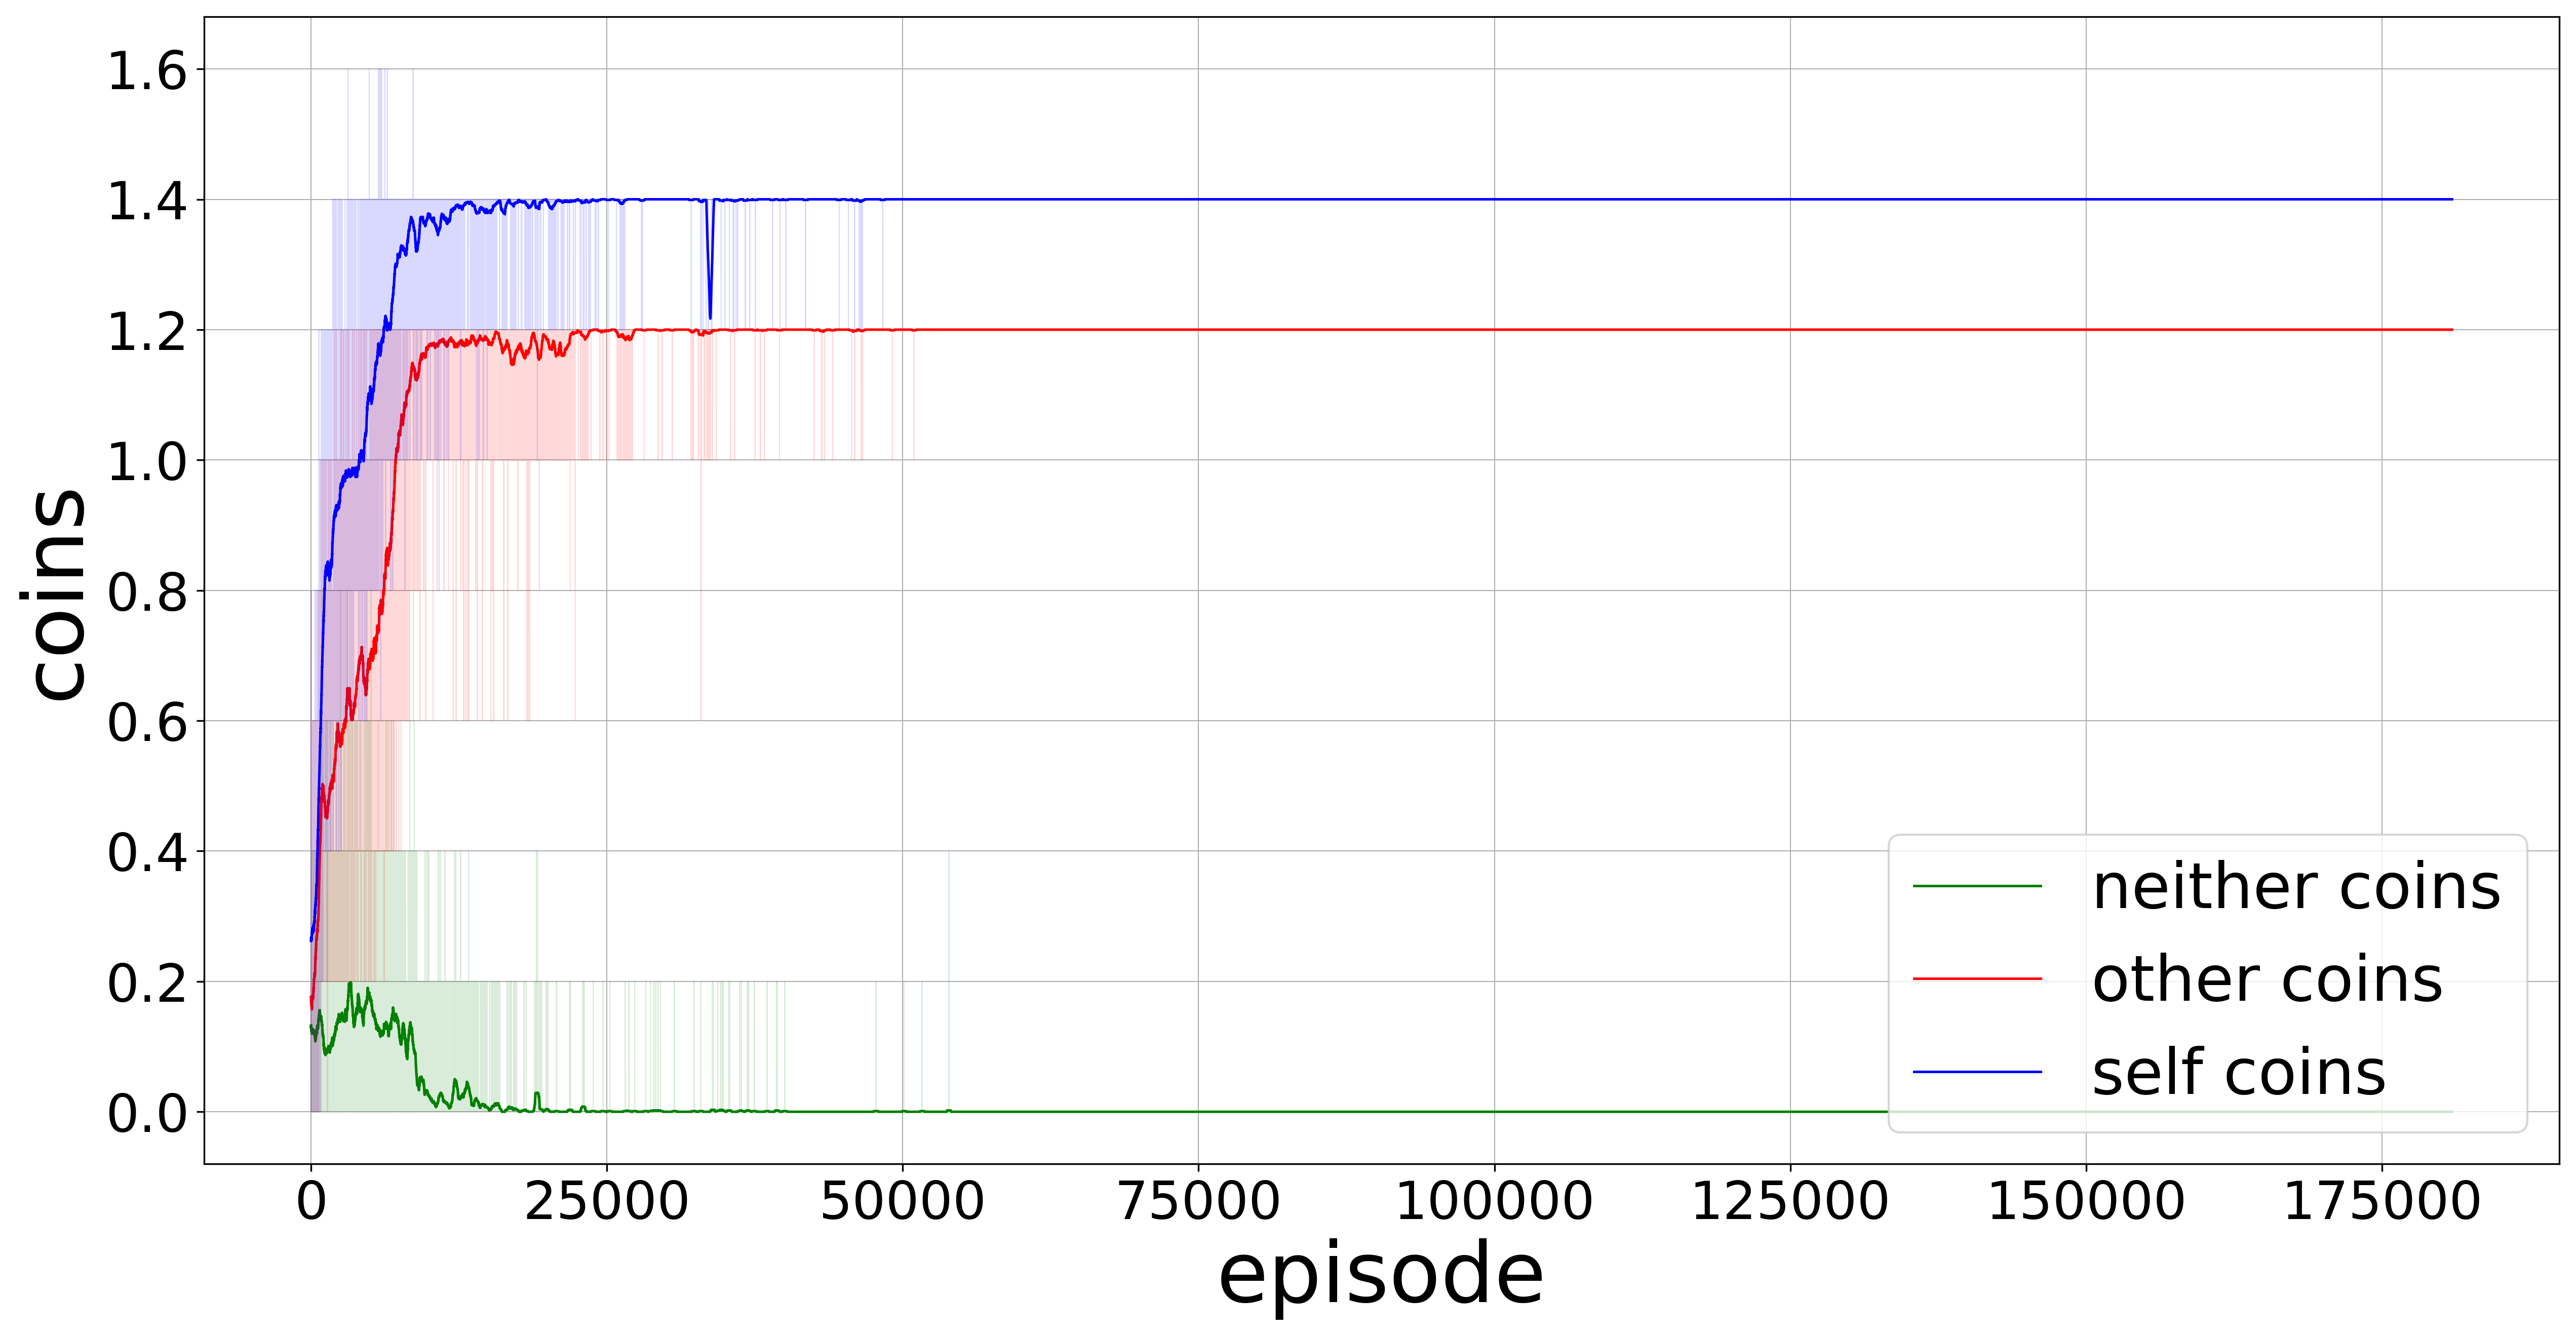

In [45]:
plt.figure(figsize=(20, 10), dpi = 300)
plt.plot(episodes_n_2, list(neth_c_2['50 wo map - neither_coins2']), alpha=0.15, c='g', linewidth=0.5)
plt.plot(episodes_n_2, smoothed_neth_2, label='neither coins', c='g', linewidth=1.2)

plt.plot(episodes_o_2, list(othr_c_2['50 wo map - other_coins2']), alpha=0.15, c='r', linewidth=0.5)
plt.plot(episodes_o_2, smoothed_othr_2, label='other coins', c='r', linewidth=1.2)

plt.plot(episodes_s_2, list(self_c_2['50 wo map - self_coins2']), alpha=0.15, c='b', linewidth=0.5)
plt.plot(episodes_s_2, smoothed_self_2, label='self coins', c='b', linewidth=1.2)
plt.xlabel('episode', fontsize=40)
plt.ylabel('coins', fontsize=40)
plt.xticks(fontsize=25, rotation=0)
plt.yticks(fontsize=25, rotation=0)
plt.grid(linewidth='0.5')
plt.legend(fontsize=30, loc = 4)
plt.show()